*Задание:*
1. Реализовать алгоритм k ближайших соседей
2. Обучить алгоритм на выборке ирисов Фишера (приложена к заданию, `iris.json`)
3. Построить карту классификации для точек, не входящих в обучающую выборку для демонстрации корректной работы алгоритма
(пример в приложении `classification.png`). Отобразить результаты на графике

Загрузим выборку ирисов Фишера:

In [82]:
import json

with open('iris.json') as f:
  iris_dict = json.loads(f.read())

Разделим объекты выборки с ответами:

In [83]:
import pandas as pd
df = pd.DataFrame(iris_dict, columns=["x", "y", "ans"])
X = df[['x', 'y']]
y = df[['ans']].iloc[:, 0]

Обучим KNN-классификатор при помощи Leave One Out:

In [84]:
import matplotlib.pyplot as plt
import numpy as np

class KNNClassifier:
    X: pd.DataFrame
    y: pd.Series
    k: int
    train_acc: list[float]

    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.train_acc = []
        self.k = 0
        self.train()

    @property
    def dataset_size(self):
        return len(self.X)

    @staticmethod
    def distance(a, b):
        return np.sum((a - b)**2)

    def _predict_for_all_k(self, obj, X, y):
        dataset = zip(X.values, y.values)
        nearest_objects = sorted(dataset, key=lambda zipped: self.distance(zipped[0], obj))

        classes = {cur_class: 0 for cur_class in y.unique()}
        answers = []
        for k in range(len(nearest_objects)):
            classes[nearest_objects[k][1]] += 1
            answers.append(max(classes, key=classes.get))

        return answers

    def train(self):
        scores = np.zeros(self.dataset_size - 1)
        for idx in range(self.dataset_size):
            cur_X, cur_y = self.X.drop(idx), self.y.drop(idx)
            predictions = self._predict_for_all_k(self.X.iloc[idx], cur_X, cur_y)
            scores += np.array([label == self.y.iloc[idx] for label in predictions])

        scores /= self.dataset_size
        self.k = np.argmax(scores) + 1
        self.train_acc = scores

    def predict(self, obj):
        dataset = zip(X.values, y.values)
        nearest_objects = sorted(dataset, key=lambda zipped: self.distance(zipped[0], obj))[:self.k]
        classes = {
            cur_class: sum(obj_class == cur_class for _, obj_class in nearest_objects)
            for cur_class in y.unique()
        }

        return max(classes, key=classes.get)

    def visualize_training(self):
        x = range(1, self.dataset_size)
        plt.plot(x, self.train_acc)
        plt.show()

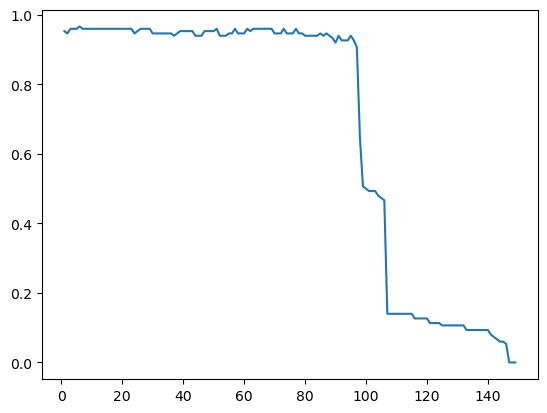

Выбрали k=6


In [85]:
model = KNNClassifier(X, y)
model.visualize_training()
print(f"Выбрали k={model.k}")

Нарисуем карту классификации:

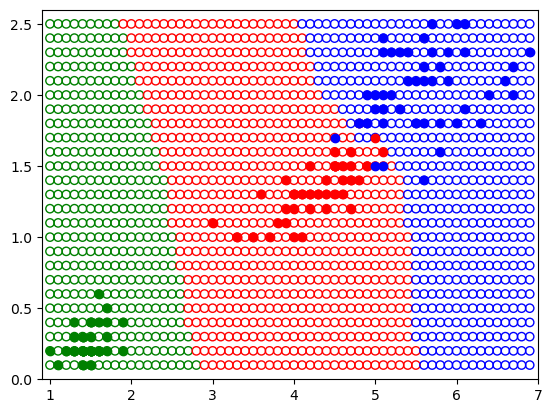

In [86]:
COLORS = {0: 'green', 1: 'red', 2: 'blue'}
STEP = 0.1

for xi in np.arange(X['x'].min(), X['x'].max() + STEP, STEP):
    for yi in np.arange(X['y'].min(), X['y'].max() + STEP, STEP):
        label = model.predict(np.array([xi, yi]))
        plt.scatter(xi, yi, color='none', edgecolor=COLORS[label])

for idx in range(model.dataset_size):
    plt.scatter(X['x'].values[idx], X['y'].values[idx], color=COLORS[y.values[idx]])

plt.xlim(X['x'].min() - STEP, X['x'].max() + STEP)
plt.ylim(X['y'].min() - STEP, X['y'].max() + STEP)
plt.show()